In [9]:
import tabulate
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (10, 4)

In [10]:
with open("../data/results/qualitative_results.json", "r") as f:
    projects = json.loads(f.read())

In [11]:
# Organize data for visualization
causes = {}
statuses = ["Merged", "Approved", "Pending", "Rejected"]
projects_per_status = {s: set() for s in statuses}  # Track unique projects per status


for project, deps in projects.items():
    for dep, details in deps.items():
        cause = details["Root Cause"]
        status = details["PR Status"]
        if status in statuses:
            if cause not in causes:
                causes[cause] = {s: 0 for s in statuses}
            causes[cause][status] += 1
            projects_per_status[status].add(project)


labels = list(causes.keys())

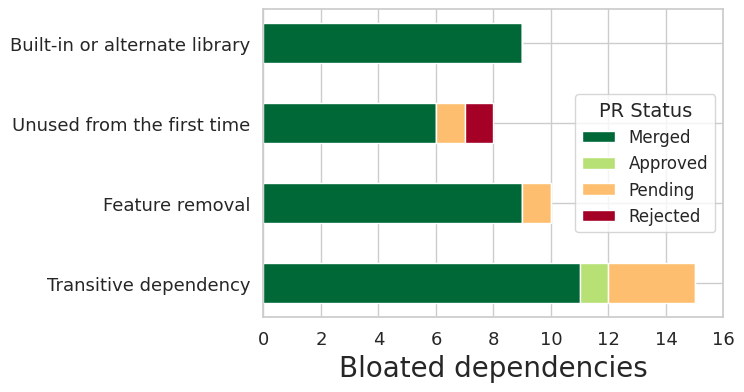

In [16]:
bottom = np.zeros(len(labels))

color_palette = plt.cm.get_cmap('RdYlGn', 4)
# Adjusting the figure size based on the number of labels
fig, ax = plt.subplots(figsize=(8, 4))

for i, status in enumerate(statuses):
    counts = [causes[label][status] for label in labels]
    ax.barh(labels, counts, left=bottom, label=status, height=0.5, color=color_palette((4 - i) / 5))  # Adjust bar thickness with height
    bottom += counts

# Set xlabel with appropriate font size
ax.set_xlabel('Bloated dependencies')

# Create space to the right of the plot
fig.subplots_adjust(right=0.7)

# Adjust the yticks and xticks font sizes

# Set the legend outside the plot on the right
# legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size": 12})
legend = ax.legend(loc='center right', prop={"size": 12})

legend.set_title("PR Status", prop={"size": 14})
ax.set_xlim(0, 16)  # Adjust x-axis limits

plt.gca().invert_yaxis() 
plt.savefig("rq4.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()


In [13]:
total_prs = sum([len(projects_per_status[status]) for status in statuses])
total_deps_removed = sum([causes[cause][status] for cause in causes for status in statuses])

latex_table = r"""
\begin{table}[h]
\caption{Pull Request (PR) Outcomes for Removal of Bloated Dependencies}
\label{tab:pr_outcomes}
\centering
\resizebox{0.9\linewidth}{!}{
\begin{tabular}{lrr}
\hline
{\bf PR Status} & {\bf Number of PRs} & {\bf Number of Dependencies Removed} \bigstrut\\
\hline
"""

for status in statuses:
    num_prs = len(projects_per_status[status])
    num_deps_removed = sum([causes[cause][status] for cause in causes if status in causes[cause]])
    latex_table += f"{status} & \\nnum{{{num_prs}}} & \\nnum{{{num_deps_removed}}} \\\\\n" 

latex_table += f"\\hline\nTotal & \\nnum{{{total_prs}}} & \\nnum{{{total_deps_removed}}} \\bigstrut \\\\\n\\hline\n"

latex_table += r"""
\end{tabular}}
\end{table}
"""

with open("rq4_pr_status.tex", "w") as file:
    file.write(latex_table)




In [14]:
data = projects
# Create lists to store merged_at dates
same_date = set()
within_week = set()
within_month = set()

remaining = set()

# Convert string dates to datetime objects and categorize PRs
for repo, pr_data in data.items():
    for pr, pr_info in pr_data.items():
        duration = pr_info.get('Duration', -111)
        if duration>=0:
            if duration <1:
                same_date.add(repo)
            elif duration < 8:
                within_week.add(repo)
            elif duration < 32:
                within_month.add(repo)
            else:
                remaining.add(repo)

# Output the results
print("Pull Requests Merged on the Same Date:", len(same_date))
print("Pull Requests Merged Within Week:", len(within_week))
print("Pull Requests Merged Within Month:", len(within_month))
print("Pull Requests Merged more than Month:", len(remaining))
duration_counts = [len(same_date), len(within_week), len(within_month),  len(remaining)]

Pull Requests Merged on the Same Date: 5
Pull Requests Merged Within Week: 6
Pull Requests Merged Within Month: 9
Pull Requests Merged more than Month: 10


 <!-- discussion (no contribution) 
https://github.com/EasyPost/easypost-python/pull/294
disucssion (revert noe of changes)
https://github.com/SDXorg/pysd/pull/423
https://github.com/kivy/kivy-ios/pull/840
https://github.com/SasView/sasview/pull/2585
discussion (test failing) (no contribution)
https://github.com/ably/ably-python/pull/526
https://github.com/Juniper/py-junos-eznc/pull/1257
https://github.com/django-helpdesk/django-helpdesk/pull/1112
discussion (filll contributing guidelines) contribution
https://github.com/openedx/edx-drf-extensions/pull/377
https://github.com/4dn-dcic/tibanna/pull/393
 -->


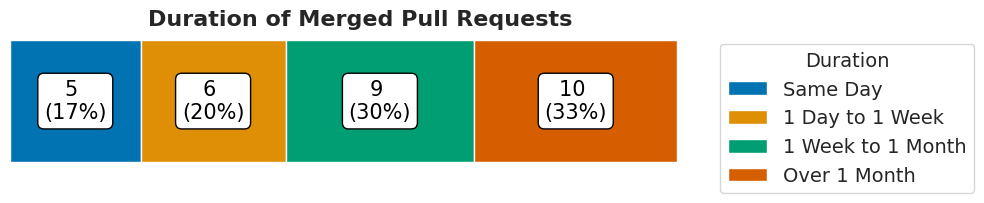

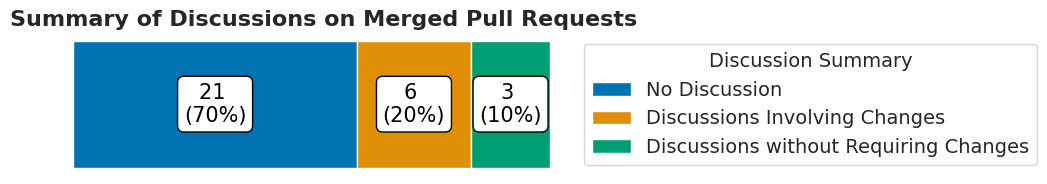

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Function to create a horizontal stacked bar chart
def create_stacked_bar_chart(categories, counts, colors, title, filename, legend_title):
    # Calculate percentages and labels
    total = sum(counts)
    percentages = [count / total * 100 for count in counts]
    labels = [f'{count} \n({percent:.0f}%)' for percent, count in zip(percentages, counts)]
    
    # Create figure and bar chart
    fig, ax = plt.subplots(figsize=(10, 2))  # Figure size can be adjusted
    left = 0
    for idx, (count, label) in enumerate(zip(counts, labels)):
        # ax.barh(0, count+4, left=left, color=colors[idx], edgecolor='white')
        # ax.text(left + (count+2) / 2, 0, label, ha='center', va='center', fontsize=15, color='black',   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        # left += count
        # Adjusting bar width by adding an offset
        bar_width = count + 4
        ax.barh(0, bar_width, left=left, color=colors[idx], edgecolor='white')
        
        # Check if there is enough space to draw the text without overlap
        if idx < len(counts) - 1 and (left + bar_width + counts[idx+1]/2) < (left + bar_width + counts[idx+1] + 2):
            # Not enough space for the next text, only draw if this is the larger segment
            ax.text(left +2+ count / 2, 0, label, ha='center', va='center', fontsize=15, color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        else:
            # Enough space, draw the text
            ax.text(left + 2+count / 2, 0, label, ha='center', va='center', fontsize=15, color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        
        left += bar_width 
    # Set title and remove axes
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.axis('off')

    # Create and set custom legend
    legend_handles = [Patch(facecolor=colors[i], label=categories[i]) for i in range(len(categories))]
    ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1), fontsize=14, title=legend_title, title_fontsize=14)

    # Save the plot as a PDF
    plt.tight_layout()
    plt.savefig(filename, format="pdf", bbox_inches='tight')


# Setup for Duration
colors_durations = sns.color_palette("colorblind", 4)
duration_categories = ['Same Day', '1 Day to 1 Week', '1 Week to 1 Month', 'Over 1 Month']

# Setup for Discussion
colors_discussions = sns.color_palette("colorblind", 5)
discussion_categories = ['No Discussion', 'Discussions Involving Changes', 'Discussions without Requiring Changes']
discussion_counts = [21, 6, 3]

# Generate horizontal stacked bar chart for Duration
duration_filename = create_stacked_bar_chart(
    duration_categories, 
    duration_counts, 
    colors_durations, 
    'Duration of Merged Pull Requests', 
    'rq4b1.pdf',
    "Duration"
)

# Generate horizontal stacked bar chart for Discussion
discussion_filename = create_stacked_bar_chart(
    discussion_categories, 
    discussion_counts, 
    colors_discussions, 
    'Summary of Discussions on Merged Pull Requests', 
    'rq4b2.pdf',
    "Discussion Summary"
)
